Group 125 - Christian Algaranaz, Krish Arora, Mike Min, Musa Sayeed

# How to Pick A Top-Performing Investment Portfolio Based On Different Economic Assumptions About the American Economy

# Introduction
___

The investment world is a vast place with countless financial products to choose from! Our project focuses explicitly on investment portfolios/bundles composed of different equity and bond mutual funds;  a mutual fund is a type of investment vehicle that pools different assets, such as stocks or bonds. More specifically, we are interested in exploring the annual performance of 6 different portfolios, with each having a unique mutual fund composition (see diagram 1 below as a reference), from 1997-2021. Based on these returns, we then pay attention to annual U.S. inflation, unemployment, and GDP growth rates data for the same time span. These explanatory variables will then help predict and answer our project question: **Which investment portfolio is expected to earn the highest return under different U.S. inflation, unemployment, and real GDP growth expectations?** A focus is given to U.S. data since the American stock market accounts for ~60% of the world's total market capitalization.

The rationale behind choosing annual inflation, GDP growth, and unemployment data as predictors are that these indicators are key economic factors that influence any economy in the following ways : 

1. **Inflation**: In inflationary environments, some asset classes perform better than others. Therefore inflation may or may not  have a significant impact on your portfoli, it's all dependent on what is in your investment portfolio. Nonetheless, increases in the general price level can hurt financial portfolios  since inflation leads to lower savings to invest, and may cause  asset returns to undercompensate for inflation (Manulife Investment Management, 2022). 
 
2. **Unemployment**: almost all economic recoveries are sparked by consumer spending. We generally stay stalled in an economic period due lack of jobs and lack of spending. The slower the recovery, the higher our unemployment rate gets. Therefore, When there is a high unemployment rate, there are fewer people to spend money. This conundrum leads to less money being spent and circulated around to businesses,  banks, and investment portfolios (Campbell, 2011).
   
3. **Real GDP**: Prices of financial assets are susceptible to GDP, which is the measurement of economic health. As a result, it is positively correlated with share prices due to stronger economic growth usually translating into higher corporate profits and investor risk appetite (Kramer, 2022).

These economic changes get reflected in financial markets, ultimately impacting investment portfolios of every type. Furthermore, the KNN classification algorithm method was decided instead of regression since we are trying to predict a categorical class/label based on numerical observations. It would have been beneficial to add other economic indicators: government spending, interest rates, nominal exchange rates, and debt to GDP, but we kept it to our predictors to make it more manageable, and we were concerned that having too many predictors may cost our accuracy.

**Identifying and describing our data:**

1. Our inflation data is retrieved from the following website https://fred.stlouisfed.org/series/FPCPITOTLZGUSA, and is converted to a raw HTML file of https://raw.githubusercontent.com/Arioniums/DSCI_100_125/main/inflation_data.csv. The raw inflation dataset records inflation from 1989 to 2021. **inflation_data_c** is the cleaned inflation rate dataset that includes the annual inflation from 1997 to 2021 in the U.S.

2. Our real GDP data is retrieved from the following website https://www.statista.com/statistics/188165/annual-gdp-growth-of-the-united-states-since-1990/, and is converted to a raw HTML file of https://raw.githubusercontent.com/Arioniums/DSCI_100_125/main/real_gdp_data.csv. The raw real GDP dataset records the growth rate from 1990 to 2021. **gdp_data_c** is the cleaned real gdp growth rate dataset that includes annual gdp growth rate from 1997 to 2021 in the U.S.

3. Our unemployment data is retrieved from the following website https://data.oecd.org/unemp/unemployment-rate.htm#, and is converted to a raw HTML of https://raw.githubusercontent.com/Arioniums/DSCI_100_125/main/unemployment_rates_data.csv. The raw unemployment dataset records data from selected countries of the years 1990 to 2021. **unemployment_data_c ** is the cleaned unemployment dataset that includes the annual unemployment rate only in the U.S. from 1997 to 2021.


<img src="https://i.imgur.com/oOdGM3V.png"/>


# Methods
___

* We will conduct our data analysis by first splitting our data into **training data** and **testing data**. The class is known for our training data which includes the observations. This will be used as a basis for prediction for our classifier. Using the classifier, we can predict the class for the testing data whose classes are unknown.
* We’ll be using the **K-Nearest Neighbor Classification algorithm** from the parsnip R package in tidymodels, in order to make predictions.
    * We will use cross-validation to derive the best value to use as k.
    * We will be defining a model specification for the K-nearest neighbour and fit the model on the data by passing the model specification and data set to a fit function.
    * In the same step, we will specify the target variable (i.e, investment portfolio) and predictors that we are going to use (GDP, Inflation and Unemployment.)
* Finally, we’ll use the predict function to predict the best investment portfolio. 
    * We will provide two distinct examples to prove that our model works.
* We will visualize the result by:
    * Plotting a line graph with Returns in the y-axis and Time in the x-axis and factored by Portfolio.
      * This step requires us to first create a dataset for three columns; year, return, and portfolio name

## Expected Outcomes and Significance
___

Our findings would demonstrate each variable's relationship with each portfolio, associating the impact of inflation, real GDP, and unemployment on the aforementioned investment portfolios. Having this association will provide us with the ability to make educated guesses regarding the future performance of a given portfolio.

We expect to find which investment portfolio (based on six different mutual fund portfolios) would provide you with the highest returns for a given set of assumptions/expectations about annual US unemployment rates, inflation rates, and real GDP growth rates; these are our explanatory variables of choice. After building the knn classification algorithm that provides the best portfolio under specific inflation, real GDP, and unemployment assumptions, we will then be able to plot the return of each of the six portfolios against the year variable; this process involves effective data visualization. The ability to predict the best performing investment portfolio presents many questions. For instance, are there other portfolios that would perform better in different economic environments? What composition would yield the highest returns? What would our model predict if we used portfolios with more complex financial products beyond mutual funds? Additionally, even though project constraints will not allow us to pursue this opportunity, performing an OLS regression analysis would have been very insightful and complementary to our project. Performing six different regression analyses by graphing each portfolio return against our explanatory variables would have allowed us to find the various relationships between US real GDP, unemployment rate, and inflation rate with our individual portfolios. Having this association would have provided us with the ability to make educated guesses regarding the future returns of any given portfolio, rather than only a qualitative prediction.

### Loading and Merging the Data
___

In [1]:
library(tidyverse) #function that allows us to import our excel files in csv format

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#importing inflation rate data
inflation_url <- "https://raw.githubusercontent.com/Arioniums/DSCI_100_125/main/inflation_data.csv"
inflation_path <- "inflation_data.csv"
download.file(inflation_url, destfile = inflation_path)
inflation_data <- read_csv(inflation_path, skip=11, col_names = c("date","annual_inflation"))

#reformatting the date values and filtering years to only 1997-2021
inflation_data$date <- format(as.Date(inflation_data$date,'%y-%m-%d'),'%Y')
inflation_data_c <- filter(inflation_data, between(date, 1997, 2021))

#renaming date column into year
names(inflation_data_c)[names(inflation_data_c) == 'date'] <- 'year'

#c stands for cleaned
summary(inflation_data_c)
print("Table 1. Summary of Raw inflation Data")

Rows: 33 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): annual_inflation
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


     year           annual_inflation 
 Length:25          Min.   :-0.3555  
 Class :character   1st Qu.: 1.5860  
 Mode  :character   Median : 2.1880  
                    Mean   : 2.2168  
                    3rd Qu.: 2.8527  
                    Max.   : 4.6979  

[1] "Table 1. Summary of Raw inflation Data"


Table 1 suggests that the mean inflation rate in the US from 1997-2021 was 2.2%. This result is consistent with the average historical inflation rate in the US and developed economies of 2-3% annually.

In [1]:
#importing gdp growth rate data
real_gdp_url <- "https://raw.githubusercontent.com/Arioniums/DSCI_100_125/main/real_gdp_data.csv"
real_gdp_path <- "real_gdp_data.csv"
download.file(real_gdp_url, destfile = real_gdp_path)
real_gdp_data <- read_csv(real_gdp_path, skip=3, col_names = c("year","real_gdp_growth_rate","type"))

#reformatting the year values and filtering years to only 1997-2021
real_gdp_data$year <- format(as.Date(real_gdp_data$year, "'%y"),'%Y')
gdp_data_c <- select(real_gdp_data, year, real_gdp_growth_rate) |>
                filter(between(year, 1997, 2021))

#clarification of gdp growth rate unit (percentage)
names(gdp_data_c)[names(gdp_data_c) == 'real_gdp_growth_rate'] <- 'real_gdp_growth_rate_percentage'

#c stands for cleaned
summary(gdp_data_c)
print("Table 2. Summary of Raw GDP Data")

ERROR: Error in read_csv(real_gdp_path, skip = 3, col_names = c("year", "real_gdp_growth_rate", : could not find function "read_csv"


Table 2 suggests that from the 1997-2021 period, average and median real GDP growth in the United States was 2.3%. This average growth rate is typical for developed economies.

In [4]:
#importing annual unemployment rate data
unemployment_url <- "https://raw.githubusercontent.com/Arioniums/DSCI_100_125/main/unemployment_rates_data.csv"
unemployment_path <- "unemployment_rates_data.csv"
download.file(unemployment_url, destfile = unemployment_path)
unemployment_data <- read_csv(unemployment_path, skip=1)

#filtering for USA unemployment data, selecting for TIME and Value columns, and then filtering years to only 1997-2021
unemployment_data_c <- filter(unemployment_data, LOCATION == "USA") |>
                    select(TIME, Value) |>
                    filter(between(TIME, 1997, 2021))

##renaming TIME column into year and Value column into annual_unemployment rate
names(unemployment_data_c)[names(unemployment_data_c) == 'TIME'] <- 'year'
names(unemployment_data_c)[names(unemployment_data_c) == 'Value'] <- 'annual_unemployment_rate'

#c stands for cleaned
summary(unemployment_data_c)
print("Table 3. Summary of Raw Unemployment Data")

New names:
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`
• `` -> `...46`
• `` -> `...47`
• `` -> `...48`
• `` -> `...49`
• `` -> `...50`
• `` -> `...51`
• `` -> `...52`
• `` -> `...53`
• `` -> `...54`
• `` -> `...55`
• `` -> `...56`
• `` -> `...57`
• `` -> `...58`
• `` -> `...59`
• `` -> `...60`
• `` -> `...61`
• `` -> `...62`
• `` -> `...63`
• `` -> `...64`
• `` -> `...65`
• `` -> `...66`
• `` -> `...67`
• `` -> `...68`
• `` -> `...69`
• `` -> `...70

      year      annual_unemployment_rate
 Min.   :1997   Min.   :3.667           
 1st Qu.:2003   1st Qu.:4.617           
 Median :2009   Median :5.292           
 Mean   :2009   Mean   :5.790           
 3rd Qu.:2015   3rd Qu.:6.167           
 Max.   :2021   Max.   :9.617           

[1] "Table 3. Summary of Raw Unemployment Data"


Table 3 indicates that the mean unemployment rate in the US has been ~5.8%, which is a very healthy number as the US natural unemployment rate is estimated to be between 4.5-5.5%. The natural unemployment rate is the healthy rate of unemployment that is consistent with a stable price level and sustainable level of output (GDP) in the long run. It is also known as NAIRU: non-accelerating inflation rate of unemployment. The differential between the 4.5-5.5% range and the ~5.8% can be attributed to both frictional and cyclical unemployment.

In [5]:
#importing income portfolio return data, selecting for year, income_portfolio_path, and filtering years to only 1997-2021
income_portfolio_url <- "https://raw.githubusercontent.com/Arioniums/DSCI_100_125/main/income_portfolio_data.csv"
income_portfolio_path <- "income_portfolio_data.csv"
download.file(income_portfolio_url, destfile = income_portfolio_path)
income_portfolio_data_c <- read_csv(income_portfolio_path, skip = 1, col_names= c("year","X2","income_portfolio_return")) |>
                            select(year, income_portfolio_return) |>
                            filter(between(year, 1997, 2021))

#deleting the percentage unit in the column income_portfolio_return and renaming the income_portfolio_return into income_portfolio_return_percentage
income_portfolio_data_c$income_portfolio_return = as.numeric(gsub("[\\%,]", "", income_portfolio_data_c$income_portfolio_return))
names(income_portfolio_data_c)[names(income_portfolio_data_c) == 'income_portfolio_return'] <- 'income_portfolio_return_percentage'

#c stands for cleaned
summary(income_portfolio_data_c)
print("Table 4. Summary of Income Portfolio Returns")

Rows: 598 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): year, X2, income_portfolio_return, X4, X5, X6, X7, X8
lgl (3): X9, X10, X11

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in between(year, 1997, 2021):
“NAs introduced by coercion”


     year           income_portfolio_return_percentage
 Length:25          Min.   :-6.040                    
 Class :character   1st Qu.: 3.500                    
 Mode  :character   Median : 5.320                    
                    Mean   : 5.951                    
                    3rd Qu.: 8.390                    
                    Max.   :13.740                    

[1] "Table 4. Summary of Income Portfolio Returns"


Table 4 indicates that the mean income portfolio returns for the 1997-2021 period is ~6%, which is largely consistent with the historical US stock market real (adjusted for inflation) average returns of 6-7% annually, albeit on the lower end of the range.

In [6]:
#importing sixty/forty and forty/sixty portfolio data
sixty_forty_and_forty_sixty_portfolio_url <- "https://raw.githubusercontent.com/Arioniums/DSCI_100_125/main/sixty_forty_and_forty_sixty_portfolio_data.csv"
                                              
sf_and_fs_path <- "sixty_forty_and_forty_sixty_portfolio_data.csv"
download.file(sixty_forty_and_forty_sixty_portfolio_url, destfile = sf_and_fs_path)

#selecting for year, 60/40_portfolio_return, 40/60_portfolio_return, and filtering years to only 1997-2021
sf_fs_portfolio_data_c <- read_csv(sf_and_fs_path, skip = 3, col_names= c("year","X2","60/40_portfolio_return","X3","40/60_portfolio_return")) |>
                                                select(year, "60/40_portfolio_return", "40/60_portfolio_return") |>
                                                filter(between(year, 1997, 2021))

#deleting the percentage unit in the column 60/40_portfolio_return and renaming the 60/40_portfolio_return into 60/40_portfolio_return_percentage
sf_fs_portfolio_data_c$'60/40_portfolio_return' = as.numeric(gsub("[\\%,]", "", sf_fs_portfolio_data_c$'60/40_portfolio_return'))
names(sf_fs_portfolio_data_c)[names(sf_fs_portfolio_data_c) == '60/40_portfolio_return'] <- '60/40_portfolio_return_percentage'

#deleting the percentage unit in the column 40/60_portfolio_return and renaming the 40/60_portfolio_return into 40/60_portfolio_return_percentage
sf_fs_portfolio_data_c$'40/60_portfolio_return' = as.numeric(gsub("[\\%,]", "", sf_fs_portfolio_data_c$'40/60_portfolio_return'))
names(sf_fs_portfolio_data_c)[names(sf_fs_portfolio_data_c) == '40/60_portfolio_return'] <- '40/60_portfolio_return_percentage'

#c stands for cleaned
summary(sf_fs_portfolio_data_c)
print("Table 5. Summary of 60/40 and 40/60 Portfolio Returns")

Rows: 769 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): year, X2, 60/40_portfolio_return, X3, 40/60_portfolio_return, X6, X...
lgl (3): X9, X10, X11

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in between(year, 1997, 2021):
“NAs introduced by coercion”


     year           60/40_portfolio_return_percentage
 Length:25          Min.   :-20.200                  
 Class :character   1st Qu.:  3.600                  
 Mode  :character   Median : 11.010                  
                    Mean   :  8.737                  
                    3rd Qu.: 15.570                  
                    Max.   : 22.370                  
 40/60_portfolio_return_percentage
 Min.   :-11.780                  
 1st Qu.:  3.830                  
 Median :  8.770                  
 Mean   :  7.429                  
 3rd Qu.: 11.980                  
 Max.   : 18.060                  

[1] "Table 5. Summary of 60/40 and 40/60 Portfolio Returns"


Table 5 indicates that the mean 60/40 and 40/60 portfolio returns for the 1997-2021 period are 8.7% and 7.4, respectively. These results indicate that the 60/40 portfolio tends to outperform historical US stock market real average returns of 6-7% annually. On the other hand, 40/60 portfolio average returns tend to outperform historical averages just slightly.

In [7]:
#downloading growth, moderate, conservative portfolio data
gmc_url <- "https://raw.githubusercontent.com/Arioniums/DSCI_100_125/main/growth_moderate_conservative_portfolios.csv"
gmc_path <- "growth_moderate_conservative_portfolios.csv"
download.file(gmc_url, destfile = gmc_path)

#importing growth, moderate, conservative portfolio data, selecting for year, growth_portfolio_return, moderate_portfolio_return, conservative_portfolio_return, and filter to only 1997-2021
gmc_portfolios_data_c <- read_csv(gmc_path, skip = 3, col_names= c("year","X2","growth_portfolio_return","X3","moderate_portfolio_return","X4","conservative_portfolio_return")) |>
                                                select(year, growth_portfolio_return, moderate_portfolio_return, conservative_portfolio_return) |>
                                                filter(between(year, 1997, 2021))

#deleting the percentage unit in the column growth_portfolio_return and renaming the growth_portfolio_return into growth_portfolio_return_percentage
gmc_portfolios_data_c$'growth_portfolio_return' = as.numeric(gsub("[\\%,]", "", gmc_portfolios_data_c$'growth_portfolio_return'))
names(gmc_portfolios_data_c)[names(gmc_portfolios_data_c) == 'growth_portfolio_return'] <- 'growth_portfolio_return_percentage'

#deleting the percentage unit in the column moderate_portfolio_return and renaming the moderate_portfolio_return into moderate_portfolio_return_percentage
gmc_portfolios_data_c$'moderate_portfolio_return' = as.numeric(gsub("[\\%,]", "", gmc_portfolios_data_c$'moderate_portfolio_return'))
names(gmc_portfolios_data_c)[names(gmc_portfolios_data_c) == 'moderate_portfolio_return'] <- 'moderate_portfolio_return_percentage'

#deleting the percentage unit in the column conservative_portfolio_return and renaming the conservative_portfolio_return into conservative_portfolio_return_percentage
gmc_portfolios_data_c$'conservative_portfolio_return' = as.numeric(gsub("[\\%,]", "", gmc_portfolios_data_c$'conservative_portfolio_return'))
names(gmc_portfolios_data_c)[names(gmc_portfolios_data_c) == 'conservative_portfolio_return'] <- 'conservative_portfolio_return_percentage'

#c stands for cleaned
summary(gmc_portfolios_data_c)
print("Table 6. Summary of Growth, Moderate, Conservative Portfolio Returns")

Rows: 782 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): year, X2, growth_portfolio_return, X3, moderate_portfolio_return, ...
lgl  (4): X13, X14, X15, X16

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in between(year, 1997, 2021):
“NAs introduced by coercion”


     year           growth_portfolio_return_percentage
 Length:25          Min.   :-31.14                    
 Class :character   1st Qu.: -1.23                    
 Mode  :character   Median : 13.41                    
                    Mean   :  8.97                    
                    3rd Qu.: 18.26                    
                    Max.   : 29.08                    
 moderate_portfolio_return_percentage conservative_portfolio_return_percentage
 Min.   :-22.770                      Min.   :-14.410                         
 1st Qu.:  0.040                      1st Qu.:  2.290                         
 Median : 11.400                      Median :  9.360                         
 Mean   :  7.964                      Mean   :  6.956                         
 3rd Qu.: 15.220                      3rd Qu.: 12.030                         
 Max.   : 23.670                      Max.   : 18.260                         

[1] "Table 6. Summary of Growth, Moderate, Conservative Portfolio Returns"


Table 6 indicates that the mean growth, moderate, and conservative portfolio returns for the 1997-2021 period are ~9%, ~8%, and ~7%, respectively. These results indicate that the growth portfolio tends to outperform historical US stock market real average returns of 6-7% annually; the same applies to the moderate portfolio. On the other hand, conservative portfolio average returns tend to perform at the top range of the historical averages.

In [8]:
#merging all cleaned datasets
project_ds1 <- merge(
                    x = inflation_data_c, 
                    y = gdp_data_c,
                    by = "year")
project_ds2 <- merge(
                    x = project_ds1, 
                    y = unemployment_data_c,
                    by = "year")
project_ds3 <- merge(
                    x = project_ds2, 
                    y = income_portfolio_data_c,
                    by = "year")
project_ds4 <- merge(
                    x = project_ds3, 
                    y = sf_fs_portfolio_data_c,
                    by = "year")
project_ds_c <- merge(
                    x = project_ds4, 
                    y = gmc_portfolios_data_c,
                    by = "year")

#finding max portfolio return value and name
project_ds_c$max_portfolio_return_value <- do.call(pmax, project_ds_c[5:10])
project_ds_c$max_portfolio_return_name <- colnames(project_ds_c[5:10])[max.col(project_ds_c[5:10])]

In [9]:
#select for year, annual_inflation, real_gdp_growth_rate, annual_unemployment_rate, max_portfolio_return_value, max_portfolio_return_name
project_ds <- select(project_ds_c, year, annual_inflation, real_gdp_growth_rate_percentage, annual_unemployment_rate, max_portfolio_return_value, max_portfolio_return_name)

#Final data set, ("year" and "max_portfolio_return_value" vectors will be deleted for KNN classification training, testing, and predictions) 
project_ds
print("Table 7. Data set with the maximum portfolio return value and name to be used for the classification algorithm")

year,annual_inflation,real_gdp_growth_rate_percentage,annual_unemployment_rate,max_portfolio_return_value,max_portfolio_return_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1997,2.3376899,4.4,4.950000,22.37,60/40_portfolio_return_percentage
1998,1.5522791,4.5,4.508333,18.26,growth_portfolio_return_percentage
1999,2.1880272,4.8,4.216667,20.79,growth_portfolio_return_percentage
2000,3.3768573,4.1,3.991667,4.77,income_portfolio_return_percentage
2001,2.8261711,1.0,4.733333,3.38,income_portfolio_return_percentage
2002,1.5860316,1.7,5.775000,4.77,income_portfolio_return_percentage
2003,2.2700950,2.8,5.991667,29.08,growth_portfolio_return_percentage
2004,2.6772367,3.9,5.533333,13.41,growth_portfolio_return_percentage
2005,3.3927468,3.5,5.066667,7.68,growth_portfolio_return_percentage


[1] "Table 7. Data set with the maximum portfolio return value and name to be used for the classification algorithm"


Table 7 provides information about the top performing investment portfolios from 1997 to 2021. The names of each portfolio was selected based on comparison analysis of 6 different portfolios.
The very last column (max_portfolio_return_name) shows the name of protfolio with maximum return rate. In addition, all of the variables are in yearly figures. It's measurements are in percentages.
With the classification algorithm, we will be spliting using initial_split to split the data to be used for analysis and then to be used to for checking the code.

In [10]:
#This datatable will be saved to later use it in our visualization

final_dataframe<-collect(project_ds_c) 
write_csv(final_dataframe,"all_data.csv")

#This datatable will be saved to later use it in our KNN classification model
#Note that "year" and "max_portfolio_return_value" vectors will be unselected for KNN training, testing, and subsequent predictions

final_dataframe<-collect(project_ds) 
write_csv(final_dataframe,"final_data.csv")

## Data Visualization
___

In this section, we will visualize the return of each portfolio over the years 1997 to 2021 from our **"all_data.csv"** dataset to identify a pattern for the highest returning portfolios before predicting the portfolio with the maximum returns using the classification algorithm.

In [11]:
# Visualization code

# Call relevant libraries
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

In [12]:
# Recall the data from the project proposal and only select for year and portfolios
pf_data <- read.csv("all_data.csv") |>
        select(-annual_inflation, 
               -real_gdp_growth_rate_percentage, 
               -annual_unemployment_rate, 
               -max_portfolio_return_value, 
               -max_portfolio_return_name) 

# Renamed all of the portfolio names to clean the titles
names(pf_data)[names(pf_data) == 'income_portfolio_return_percentage'] <- 'Income_portfolio'
names(pf_data)[names(pf_data) == 'X60.40_portfolio_return_percentage'] <- '60/40_portfolio'
names(pf_data)[names(pf_data) == 'X40.60_portfolio_return_percentage'] <- '40/60_portfolio'
names(pf_data)[names(pf_data) == 'growth_portfolio_return_percentage'] <- 'Growth_portfolio'
names(pf_data)[names(pf_data) == 'moderate_portfolio_return_percentage'] <- 'Moderate_portfolio'
names(pf_data)[names(pf_data) == 'conservative_portfolio_return_percentage'] <- 'Conservative_portfolio'

# Pivot longer to tidy the data to our need: Visualization
pf_data <- pf_data|>
        pivot_longer(cols = Income_portfolio:Conservative_portfolio, 
                 names_to = "Portfolio_type", 
                 values_to = "portfolio_return_percentage")

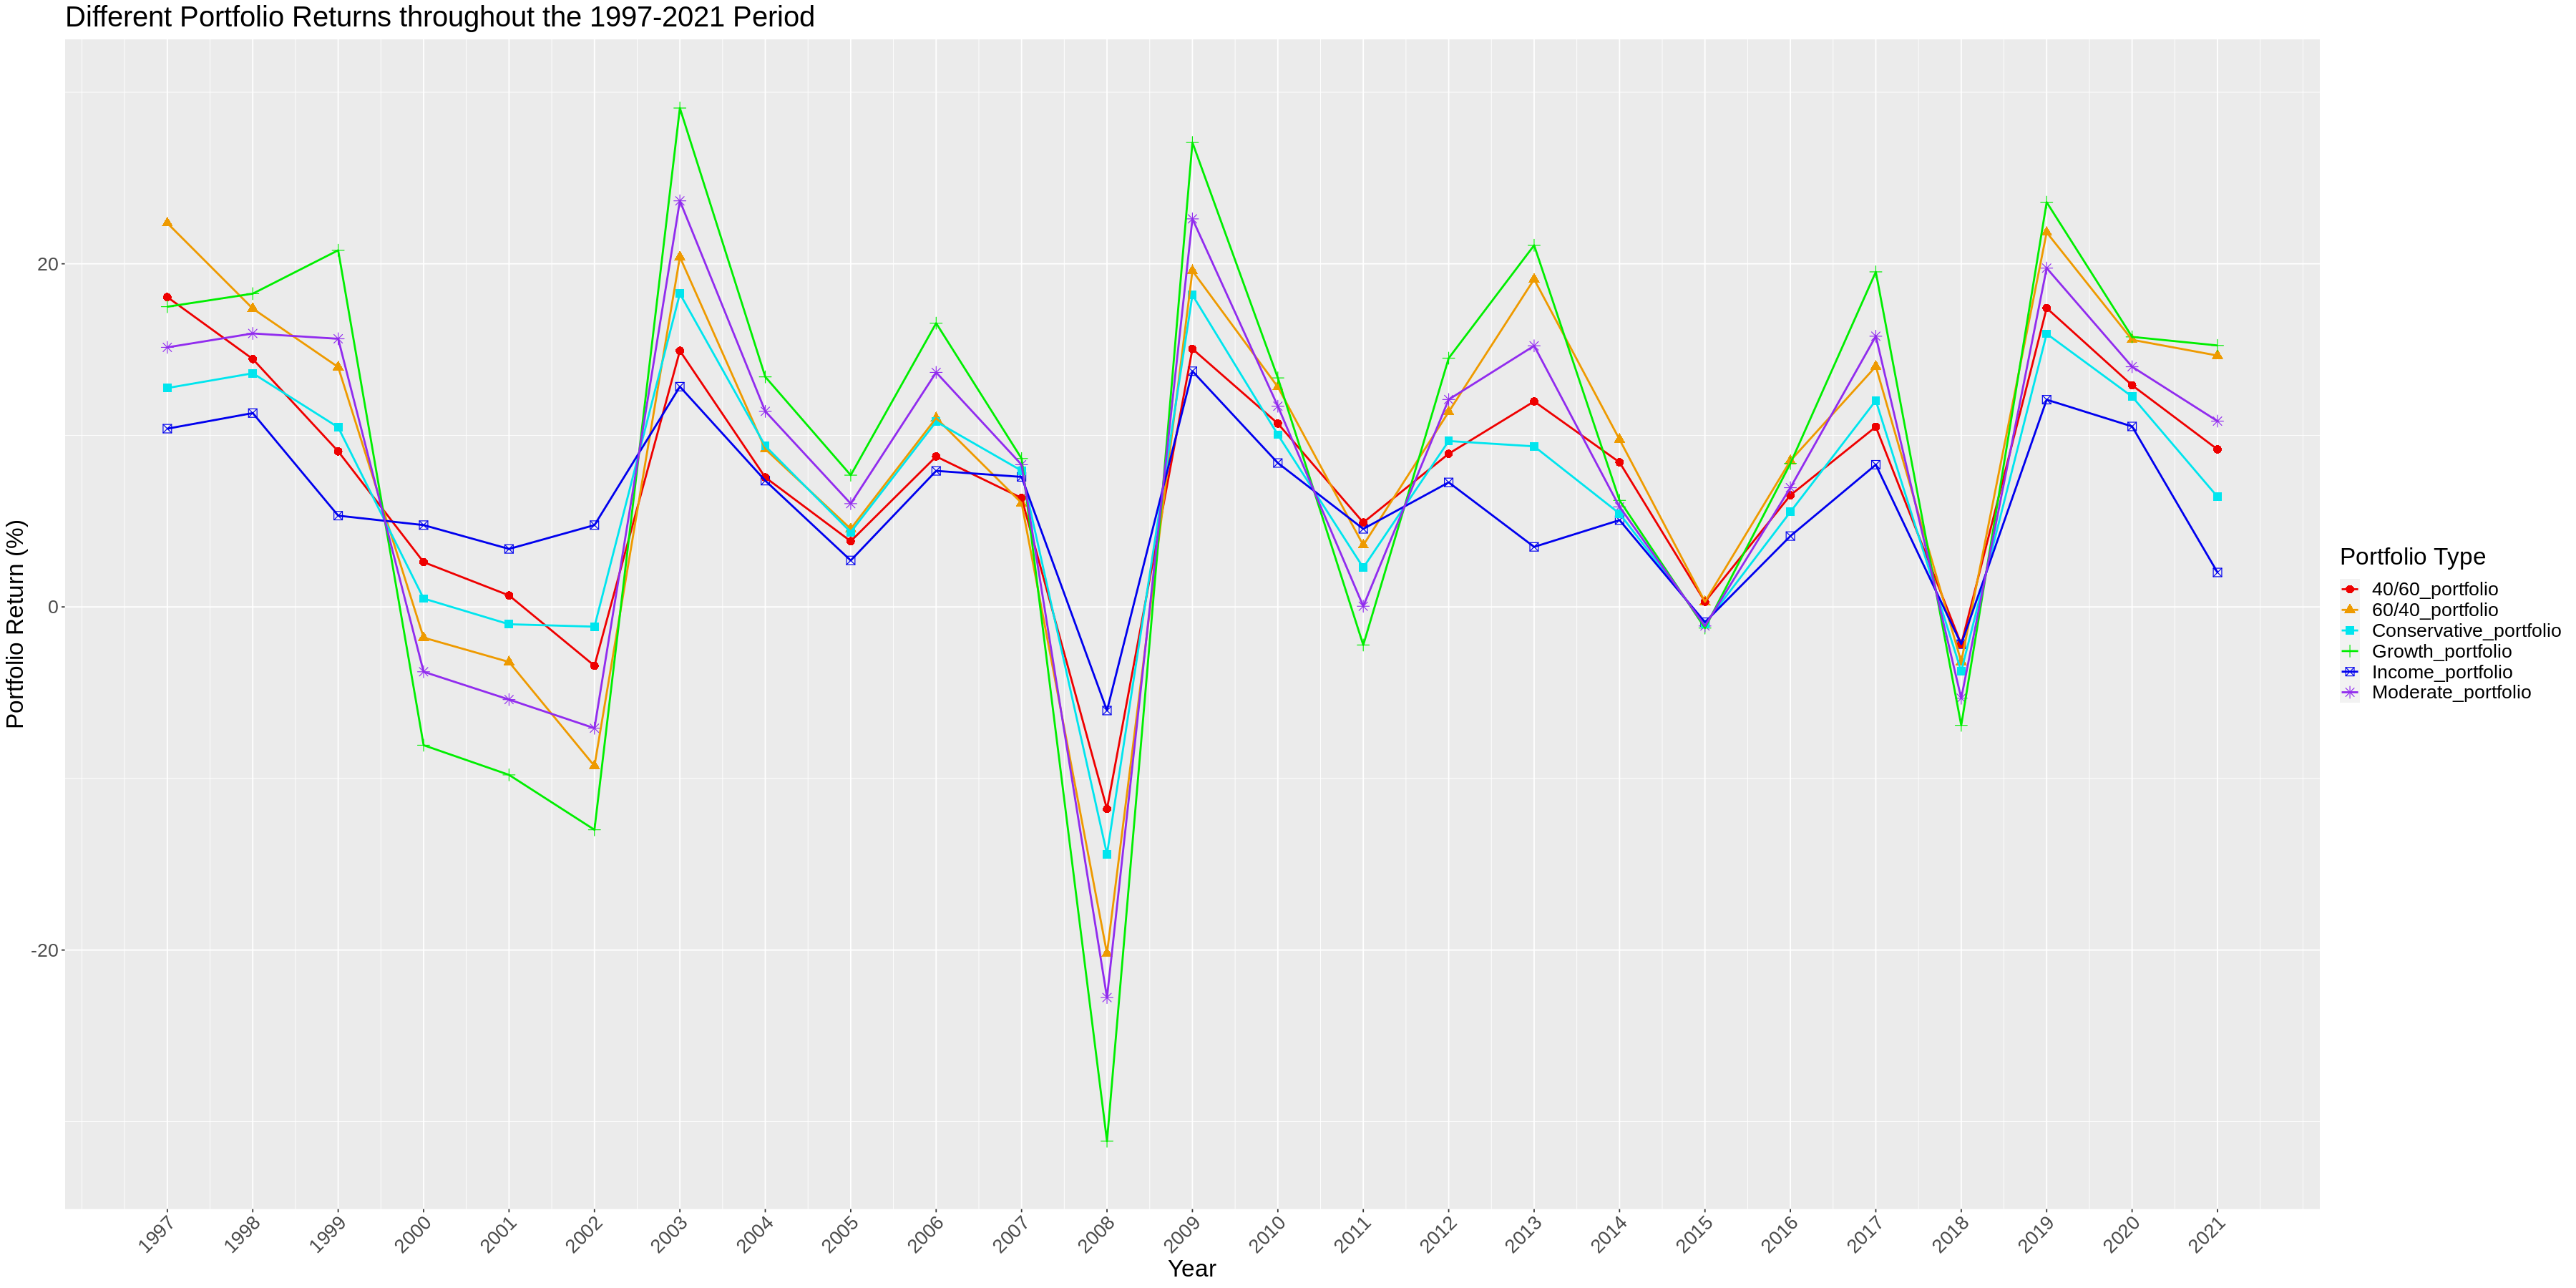

In [13]:
# Set graph size
options(repr.plot.width = 30, repr.plot.height = 15) 

# Create the graph with all of the portfolio return percentages
pf_plot <- pf_data |>
ggplot(aes(x = year, y = portfolio_return_percentage)) + 
geom_point(aes(color = Portfolio_type, shape = Portfolio_type), size = 3) +
geom_line(aes(color = Portfolio_type), lwd = 0.8)  +
scale_color_manual(values = c("red2", "orange2", "turquoise2", "green2", "blue2", "purple2")) +
labs(x = "Year", y = "Portfolio Return (%)", colour = "Portfolio Type", shape = "Portfolio Type") +
ggtitle("Different Portfolio Returns throughout the 1997-2021 Period") +
scale_x_continuous(breaks = seq(1997, 2021, by = 1)) +  # adjusting the x-axis
scale_y_continuous(limits = c(-32, 30)) + # adjusting the y-axis +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
theme(text = element_text(size=20))

# Check the product
pf_plot

# Save the graph as PNG file
ggsave(filename = "Portfolio.png", pf_plot,
       width = 20, height = 15, dpi = 150, units = "in", device='png')

### Graph Interpretation:
___

In general terms, the portfolio returns tend to move in the same direction, albeit with varying volatility. The most "stable" portfolio seems to be the Income portfolio. In contrast, the most volatile is the Growth portfolio. This finding indicates that investors interested in building "bullet-proof" or "all-weather" portfolios should opt for an Income approach. The Income portfolio has been less responsive to economic environments throughout the years. For instance, in the Great Financial Crisis of 2008, Income outperformed all other strategies. Additionally, it is essential to recall that higher risk yields higher returns. This principle of risk-return tradeoff can be observed in the graph. For instance, Growth portfolio returns are the most volatile but also the one with the highest return and Maximum Drawdown (MDD). Additionally, Income portfolio returns are the most stable and conservative ones, but this should not be of any surprise since this portfolio has the highest relative allocation to bond mutual funds; bonds are intrinsically less risky than equity/stocks

## KNN classification Algorithm
___

In [14]:
#before continuing the following packages need to be runned

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



In [15]:
#reading our finalized data before implementing KNN classification algorithm

portfolio_data <- read_csv("final_data.csv")|>
mutate(max_portfolio_return_name = as_factor(max_portfolio_return_name))|>
select(-year, -max_portfolio_return_value)

Rows: 25 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): max_portfolio_return_name
dbl (5): year, annual_inflation, real_gdp_growth_rate_percentage, annual_une...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
#exploring our data:

num_obs <- nrow(portfolio_data)

portfolio_data |>
group_by(max_portfolio_return_name) |>
summarize(count = n(), percentage = n() / num_obs * 100)
print("Table 8. Label Composition for Table 7")

max_portfolio_return_name,count,percentage
<fct>,<int>,<dbl>
60/40_portfolio_return_percentage,3,12
growth_portfolio_return_percentage,15,60
income_portfolio_return_percentage,5,20
40/60_portfolio_return_percentage,2,8


[1] "Table 8. Label Composition for Table 7"


**Word of caution**: Table 8 shows that our data seems to have too much "growth_portfolio" labels. Thus, rebalancing could be attempted:

In [17]:
set.seed(9999)

#performing rebalancing:
install.packages("themis")
library (themis)

ups_recipe <- recipe(max_portfolio_return_name ~ ., data = portfolio_data) |>
step_upsample(max_portfolio_return_name, over_ratio = 1, skip = FALSE) |>
prep()
ups_recipe

upsampled_portfolio <- bake(ups_recipe, portfolio_data)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Training data contained 25 data points and no missing data.

Operations:

Up-sampling based on max_portfolio_return_name [trained]

In [18]:
#comparing upsampled vs normal data:

upsampled_portfolio
print("Table 9. Upsampled Portfolio Data")
portfolio_data
print("Table 10. Original Portfolio Data")

annual_inflation,real_gdp_growth_rate_percentage,annual_unemployment_rate,max_portfolio_return_name
<dbl>,<dbl>,<dbl>,<fct>
1.261583,1.7,4.866667,60/40_portfolio_return_percentage
1.622223,2.3,6.166667,60/40_portfolio_return_percentage
1.622223,2.3,6.166667,60/40_portfolio_return_percentage
⋮,⋮,⋮,⋮
3.156842,1.5,8.95,40/60_portfolio_return_percentage
3.156842,1.5,8.95,40/60_portfolio_return_percentage
3.156842,1.5,8.95,40/60_portfolio_return_percentage


[1] "Table 9. Upsampled Portfolio Data"


annual_inflation,real_gdp_growth_rate_percentage,annual_unemployment_rate,max_portfolio_return_name
<dbl>,<dbl>,<dbl>,<fct>
2.337690,4.4,4.950000,60/40_portfolio_return_percentage
1.552279,4.5,4.508333,growth_portfolio_return_percentage
2.188027,4.8,4.216667,growth_portfolio_return_percentage
⋮,⋮,⋮,⋮
1.812210,2.3,3.666667,growth_portfolio_return_percentage
1.233584,-3.4,8.091666,growth_portfolio_return_percentage
4.697859,5.7,5.366667,growth_portfolio_return_percentage


[1] "Table 10. Original Portfolio Data"


By upsampling our data, we achieve equal label proportions (15% each) for Table 10.

By contrasting Table 9 and 10, we can see that upsampling would harm our data as it would create fictitious data points just for the sake of balancing out the labels. This in turn, would harm our real-life prediction accuracy interpretation since the data point created don't make any real sense. **Therefore, for the rest of the classification, we won't be using upsampled data.**

In [19]:
set.seed(9999) #ensuring reproducibility
options(repr.plot.height = 5, repr.plot.width = 6)

#splitting with normal data:
portfolio_split <- initial_split(portfolio_data, prop = 0.75, strata = max_portfolio_return_name)
portfolio_train <- training(portfolio_split)
portfolio_test <- testing(portfolio_split) 


#exploring distribution of labels in each split:

portfolio_train |>
group_by(max_portfolio_return_name) |>
summarize(count = n(), percentage = n() / num_obs * 100)

print("Table 11. Label Composition for training dataset")

portfolio_test |>
group_by(max_portfolio_return_name) |>
summarize(count = n(), percentage = n() / num_obs * 100)

print("Table 12. Label Composition for testing dataset")

max_portfolio_return_name,count,percentage
<fct>,<int>,<dbl>
60/40_portfolio_return_percentage,2,8
growth_portfolio_return_percentage,11,44
income_portfolio_return_percentage,3,12
40/60_portfolio_return_percentage,2,8


[1] "Table 11. Label Composition for training dataset"


max_portfolio_return_name,count,percentage
<fct>,<int>,<dbl>
60/40_portfolio_return_percentage,1,4
growth_portfolio_return_percentage,4,16
income_portfolio_return_percentage,2,8


[1] "Table 12. Label Composition for testing dataset"


As seen in Table 11 and 12, the distribution of both split and test indicate that most of the data labels are "growth_portfolio". Hence this is something to bare and be critical of when interpreting our predictions below. The best way to avoid this is to ideally collect data from more years since, as mentioned above, upsampling would harm the real-life applicability of the model.

In [20]:
set.seed(9999)

#recipe with normal data:
knn_recipe <- recipe(max_portfolio_return_name ~ annual_inflation + real_gdp_growth_rate_percentage + annual_unemployment_rate, data = portfolio_train) |>
    step_center(all_predictors()) |>
    step_scale (all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
set_engine("kknn") |>
set_mode("classification") 

! Fold1: preprocessor 1/1, model 1/1: 12 samples were requested but there were 12 rows in the data. 7 will be ...

! Fold2: preprocessor 1/1, model 1/1: 12 samples were requested but there were 13 rows in the data. 8 will be ...

! Fold3: preprocessor 1/1, model 1/1: 12 samples were requested but there were 15 rows in the data. 10 will be...

! Fold3: internal:
  No observations were detected in `truth` for level(s): '60/40_portfoli...
  Computation will proceed by ignoring those levels.

! Fold4: preprocessor 1/1, model 1/1: 12 samples were requested but there were 16 rows in the data. 11 will be...

! Fold4: internal:
  No observations were detected in `truth` for level(s): '60/40_portfoli...
  Computation will proceed by ignoring those levels.

! Fold5: preprocessor 1/1, model 1/1: 12 samples were requested but there were 16 rows in the data. 11 will be...

! Fold5: internal:
  No observations were detected in `truth` for level(s): '60/40_portfoli...
  Computation will proceed by ig

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,accuracy,multiclass,0.7133333,5,0.1245436,Preprocessor1_Model03
4,accuracy,multiclass,0.7133333,5,0.1245436,Preprocessor1_Model04
5,accuracy,multiclass,0.7133333,5,0.1245436,Preprocessor1_Model05
⋮,⋮,⋮,⋮,⋮,⋮,⋮
12,accuracy,multiclass,0.7133333,5,0.1245436,Preprocessor1_Model12
1,accuracy,multiclass,0.6133333,5,0.1057250,Preprocessor1_Model01
2,accuracy,multiclass,0.6133333,5,0.1057250,Preprocessor1_Model02


[1] "Table 13. Model Estimated Accuracies for K = 1 to 12"
[1] "Diagram 2. Cross validation plot"


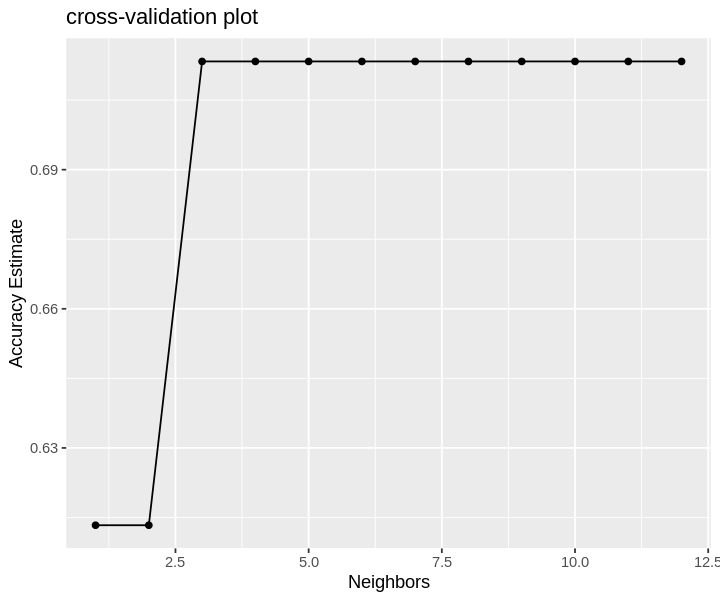

In [21]:
set.seed(9999) #ensuring reproducibility

#performing 5 fold cross validation
knn_vfold <- vfold_cv(portfolio_train, v = 5, strata = max_portfolio_return_name)
gridvals <- tibble(neighbors = seq(from = 1, to = 12))

knn_results <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = knn_vfold, grid = gridvals) |>
  collect_metrics() 

accuracies <- knn_results |> 
       filter(.metric == "accuracy") |>
       arrange(desc(mean))
accuracies

print("Table 13. Model Estimated Accuracies for K = 1 to 12")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("cross-validation plot")
cross_val_plot

print("Diagram 2. Cross validation plot")

Based on Table 13 and Diagram 2, we will pick K = 5 because of its high accuracy and choosing k = 5 ensures that going a bit to the right or left leaves the accuracy estimate intact. Unfortunately, our data was restricted to data from 1997-2021, but we believe that collecting more data for each variable would enhance our model.

In [22]:
set.seed(9999) #ensuring reproducibility

# Applying K-nearest value with highest accuracy to our training model

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
set_engine("kknn") |>
set_mode("classification")

knn_fit <- workflow() |>
add_recipe(knn_recipe) |>
add_model(knn_spec) |>
fit(data = portfolio_train)

In [23]:
#testing model predictions with testing set

set.seed(9999) #ensuring reproducibility

test_predictions <- predict(knn_fit,portfolio_test) |>
bind_cols(portfolio_test)

knn_metrics <- test_predictions |>
metrics(truth = max_portfolio_return_name, estimate = .pred_class)
knn_metrics

print("Table 14. KNN metrics")

#accuracy seems unaffected when applying model to testing dataset

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7142857
kap,multiclass,0.4400000


[1] "Table 14. KNN metrics"


By recalling the ranges for each of our explanatory variables from Table 1, 2 and 3, we need to be mindful that annual inflatoin ranges from -0.355% to 4.69%, real GDP ranges from -3.4% to 5.7% and annual unemployment ranges from 3.667% to 9.617%. We need to be make sure that our predictions fall between these ranges.

In [25]:
set.seed(9999)
#These are the two new observation to we will predict:

new_economic_environment_1 <- tibble(annual_inflation = 2, real_gdp_growth_rate_percentage = 5, annual_unemployment_rate = 3.8)
portfolio_prediction_1 <- predict(knn_fit, new_economic_environment_1)
portfolio_prediction_1

print("Table 15. Label Prediction for new_economic_environment_1")

new_economic_environment_2 <- tibble(annual_inflation = 3, real_gdp_growth_rate_percentage = -2, annual_unemployment_rate = 5)
portfolio_prediction_2 <- predict(knn_fit, new_economic_environment_2)
portfolio_prediction_2

print("Table 16. Label Prediction for new_economic_environment_2")

.pred_class
<fct>
growth_portfolio_return_percentage


[1] "Table 15. Label Prediction for new_economic_environment_1"


.pred_class
<fct>
income_portfolio_return_percentage


[1] "Table 16. Label Prediction for new_economic_environment_2"


### Interpreting Model Predictions:
___

Based on an economic environment with an expected annual US inflation, real GDP, and unemployment rate of 2%, 5%, and 3.8%, respectively, our model predicts that the top-performing portfolio (out of the six we incorporated in our model) will be the growth portfolio. On the other hand, if we change our predictions to expected annual US inflation, real GDP, and unemployment rates of 3%, -2%, and 5%, respectively, the income portfolio is expected to perform best.

The model is fascinating and could potentially provide real-world professional investment advice. Nonetheless, the model lacks a lot of data and accuracy to be a serious contender. As previously mentioned, data from 1997 is not enough to have a robust model. Furthermore, an accuracy of 71% is far from ideal. Lastly, the class used in our model is limited by the number of portfolio types. Thus, this model intrinsically ignores a whole other universe of investment portfolios and financial instruments ( i.e., not just mutual funds).

Nonetheless, we believe and are hopeful that a model with similar dynamics could be built by professionals with more time and resources on their side.

# Discussion
___

### What did we find?

In the loading or merging section of the data, we first found that for the time period 1997 to 2021, the US experienced a mean inflation rate (2.2%), mean real GDP growth (2.3%), mean unemployment rate (approx. 5.8%) (Table 1, 2 and 3). We also found the mean income portfolio return (approx. 6%), mean 60/40 (8.7%) and 40/60 (7.4%) portfolio returns and mean growth (approx. 9%), moderate (approx. 8%), and conservative (approx. 7%) portfolio returns. Furthermore, from our visualization, we can see that the portfolio with the highest volatility in returns throughout the years 1997 to 2021 is the growth portfolio, whereas the one with the lowest volatility in returns was the income portfolio. This finding makes sense since the income portfolio is the bundle with the highest allocation to bonds (as seen in Diagram 1).

We then used the data from Table 7 (Note that "year" and "max_portfolio_return_value" vectors were unselected)  to train and test our model which provided an accuracy of approx. 71% (Table 13 and 14) in predicting portfolio labels. After building our model, we tested it by creating two different observations for our model to predict, which can be seen in Table 15 and 16. These tables provide the predictions for these observations along with their interpretations (Please refer to "Interpreting Model Predictions" for detailed information on this).

### Is the result different from what we expected?

We aimed to first explore the relationship between economic indicators (inflation, real GDP growth, and unemployment) and investment portfolio returns, and then use this information to predict the best-performing portfolio class/label under certain assumptions about these economic indicators. We also considered the potential limitations and areas for further exploration, such as the use of more complex financial products and regression analysis to better understand the relationships between the economic indicators and portfolio returns.

Our prediction results reflect what we would generally expect. Our model predicts that under a economic scenario of stable inflation, low unemployment, and high real GDP, the growth portfolio would outperform given it high allocation in equities and low allocation in bonds. On the other hand, in an environment of higher inflation, negative real GDP growth, and higher unemployment, the income portfolio would outperform given its high allocation in bonds and low allocation in equities. This phenomena is a proper representation of how equities and bonds function in real life.

### Impact of such findings

These findings could have several potential impacts. Firstly, they could provide investors with valuable information about the potential returns of different investment portfolios under different economic conditions. This could help investors make more informed decisions about where to allocate their money, potentially leading to higher returns. Secondly, the findings could provide policymakers with insight into the relationship between economic indicators and investment portfolios, which could inform policy decisions related to economic growth and investment. Finally, the findings could inspire further research into the relationship between economic indicators and investment portfolios, potentially leading to even more accurate predictions and better investment decisions.

### Future questions this could lead to

There are several potential future questions that could arise from this research. For instance, further research could explore the use of more complex financial products beyond mutual funds in predicting portfolio returns. Additionally, regression analysis could be used to better understand the relationships between economic indicators and portfolio returns. This could provide even more detailed and accurate predictions of portfolio performance. Additionally, research could explore the potential impacts of other factors, such as political instability or market volatility, on portfolio returns. Finally, researchers could investigate the performance of different investment portfolios in different economic environments, such as during periods of economic growth or recession, to gain a more nuanced understanding of their potential returns.

# References
___



1. Manulife Investment Management,. (2022, March 28). Inflation's effect on investment portfolios: Manulife Investment Management. Canada. https://www.manulifeim.com/retail/ca/en/viewpoints/investor-education/How-does-inflation-affect-my-investment-portfolio

2. Campbell, K. (2011, September 7). How high unemployment hurts your investments - US news & world report. How High Unemployment Hurts Your Investments. https://money.usnews.com/money/blogs/the-smarter-mutual-fund-investor/2011/09/07/how-high-unemployment-hurts-your-investments

3. Kramer, L. (2022, October 28). What is GDP and why is it so important to economists and investors? What Is GDP and Why Is It So Important to Economists and Investors? https://www.investopedia.com/ask/answers/what-is-gdp-why-its-important-to-economists-investors/

3. Inflation, consumer prices for the United States. FRED. (2022, May 3). Retrieved December 6, 2022, from https://fred.stlouisfed.org/series/FPCPITOTLZGUSA 

4. Portfolio visualizer. Portfolio Visualizer. (n.d.). Retrieved December 6, 2022, from https://www.portfoliovisualizer.com/ 

5. Published by                                    Statista Research Department, &amp; 30, S. (2022, September 30). Real GDP growth rate by year in the U.S. 2021. Statista. Retrieved December 6, 2022, from https://www.statista.com/statistics/188165/annual-gdp-growth-of-the-united-states-since-1990/ 

6. Unemployment - unemployment rate - OECD data. theOECD. (n.d.). Retrieved December 6, 2022, from https://data.oecd.org/unemp/unemployment-rate.htm# 